In [11]:
import pandas as pd
data=pd.read_csv("heart_attack_prediction_dataset.csv")

In [12]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


In [14]:
# Encode 'sex' column: male=0, female=1
data['Sex'] = data['Sex'].map({'Male': 0, 'Female': 1})
data['Sex'].head()

0    0
1    0
2    1
3    0
4    0
Name: Sex, dtype: int64

In [21]:
heartdata=pd.DataFrame(data.iloc[:, 1:-1])
heartdata.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
0,67,0,208,158/88,72,0,0,1,0,0,...,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere
1,21,0,389,165/93,98,1,1,1,1,1,...,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere
2,21,1,324,174/99,72,1,0,0,0,0,...,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere
3,84,0,383,163/100,73,1,1,1,0,1,...,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere
4,66,0,318,91/88,93,1,1,1,1,0,...,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere


In [ ]:
# Delete rows with indices 0 and 2
data = data.drop([0, 2])
data = data.reset_index(drop=True)  # Reset index after deletion
data.head()

In [ ]:
# Delete rows where the 'Name' column equals a specific value
data = data[data['Name'] != 'Continent']
data = data[data['Name'] != 'Hemisphere']
data = data.reset_index(drop=True)
data.head()

KeyError: 'Name'

In [19]:
# Rename columns using a dictionary: {'old_name': 'new_name', ...}
data.rename(columns={'Heart Attack Risk': 'Risk'},inplace=True)
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Risk
0,BMW7812,67,0,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,0,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,1,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,0,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,0,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [20]:
# Calculate and display the correlation matrix
correlation_matrix = heartdata.corr()
correlation_matrix

ValueError: could not convert string to float: '158/88'

In [12]:
print(data.shape)

(8763, 26)


C:\Users\Darsh\AppData\Local\Temp\ipykernel_1408\2599550834.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Heart Attack Risk",data=data,palette=['red','black'])


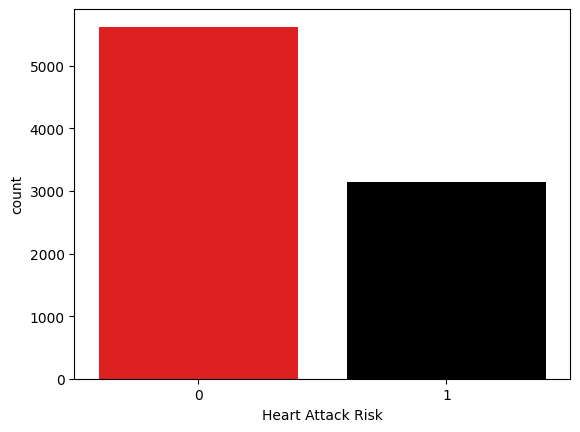

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Heart Attack Risk",data=data,palette=['red','black'])
plt.show()

In [22]:
sns.heatmap(data.corr(),annot=True)

ValueError: could not convert string to float: 'BMW7812'

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [28]:
x=pd.DataFrame(data.iloc[:,1:-1])
y=pd.DataFrame(data.iloc[:,-1])

In [29]:
x

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
0,67,Male,208,158/88,72,0,0,1,0,0,...,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere
2,21,Female,324,174/99,72,1,0,0,0,0,...,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere
3,84,Male,383,163/100,73,1,1,1,0,1,...,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere
4,66,Male,318,91/88,93,1,1,1,1,0,...,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere
8759,28,Female,120,157/102,73,1,0,0,1,0,...,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere
8760,47,Male,250,161/75,105,0,1,1,1,1,...,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere
8761,36,Male,178,119/67,60,1,0,1,0,0,...,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere


In [30]:
y

,Heart Attack Risk
0,0
1,0
2,0
3,0
4,0
...,...
8758,0
8759,0
8760,1
8761,0


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)   

In [36]:
x_train

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
5967,84,Male,217,125/83,75,1,1,1,1,1,...,10,1.737428,153618,35.185856,544,3,6,Colombia,South America,Northern Hemisphere
8270,88,Male,209,131/72,104,1,0,1,0,1,...,1,11.876890,124693,30.991599,649,2,4,Japan,Asia,Northern Hemisphere
100,90,Male,224,164/65,98,1,0,1,0,1,...,10,9.618701,154900,22.851796,255,4,5,Italy,Europe,Southern Hemisphere
3410,27,Male,376,141/70,65,0,0,1,0,1,...,4,1.968503,151338,37.513424,796,1,4,Colombia,South America,Northern Hemisphere
1790,55,Male,270,146/81,94,0,1,1,1,1,...,6,7.252388,81127,23.269040,450,2,4,South Africa,Africa,Southern Hemisphere
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,48,Male,334,94/82,43,1,0,1,1,0,...,5,2.091589,59858,33.549888,549,4,4,South Africa,Africa,Southern Hemisphere
5191,68,Female,188,116/70,69,0,0,1,0,1,...,1,0.923109,60332,26.142883,410,2,9,Thailand,Asia,Northern Hemisphere
5390,32,Female,169,156/79,84,1,0,0,1,0,...,9,5.730149,67604,39.512660,777,4,9,Nigeria,Africa,Northern Hemisphere
860,85,Female,285,165/73,54,1,1,1,1,1,...,2,8.001822,138980,25.499506,552,1,10,Nigeria,Africa,Northern Hemisphere


In [37]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

ValueError: could not convert string to float: 'Male'

In [38]:
y_pred=model.predict(x_test)

ValueError: could not convert string to float: 'Male'

In [39]:
len(y_pred)

NameError: name 'y_pred' is not defined

In [40]:
print("accuracy score:",model.score(x_test,y_test))

ValueError: could not convert string to float: 'Male'

In [41]:
print("accuracy score:", model.score(x_test, y_test))

ValueError: could not convert string to float: 'Male'

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_train, model.predict(x_train))
print(confusion_matrix)

NameError: name 'y_pred' is not defined

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model.predict(x_train)))

ValueError: could not convert string to float: 'Male'

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
model.predict(x_test)